<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 5: Alzheimer's Image Classification

---
## Problem Statement

You are a data science team that has been tasked by the UK government to develop a diagnostic solution that can improve the prediction rates of dementia and Alzheimer's within UK hospitals.  Using a Convolutional Neural Network on brain scan imaging, our group wishes to predict Alzheimer's disease with at least 50% accuracy and a recall of at least 64%. This metric is benchmarked to the average diagnostic performance of hospitals across the UK for patients, and an improvement in detection here can mean better outcomes and care for those within its early stages.

---

## Section 05 - Best Model Evaluation

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Tensorflow version 2.6.0
Found GPU at: /device:GPU:0


### Imports

In [15]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

## Neural Network Model Evaluations

### Test Data

In [9]:
# Create Test and Train 

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_dir = '/content/drive/MyDrive/data/test'
img_width = 176
img_height = 208

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=64,
    class_mode='categorical',
    seed=42
)

steps = test_gen.samples // test_gen.batch_size
print(steps)

Found 1279 images belonging to 4 classes.
19


Base line accuracy is 50%

### Fine Tuned Basic Model

In [5]:
basic_model = load_model('/content/drive/MyDrive/project-5/tuned-basic-model.h5')

In [11]:
with tf.device('/device:GPU:0'):
  basic_loss, basic_acc, basic_prec, basic_recall = basic_model.evaluate(test_gen, steps=steps, verbose=1)

19/19 [==============================] - 362s 19s/step - loss: 3.0569 - accuracy: 0.7204 - precision: 0.7210 - recall: 0.7204


### InceptionV3 Model

In [6]:
iv3_model = load_model('/content/drive/MyDrive/project-5/inceptionv3-model.h5')

In [12]:
with tf.device('/device:GPU:0'):
  iv3_loss, iv3_acc, iv3_prec, iv3_recall = iv3_model.evaluate(test_gen, steps=steps, verbose=1)

19/19 [==============================] - 4s 122ms/step - loss: 1.4929 - accuracy: 0.5929 - precision: 0.6159 - recall: 0.5592


### MobileNetV3 Model

In [7]:
mnv3_model = load_model('/content/drive/MyDrive/project-5/mobilenetv3-model.h5')

In [33]:
with tf.device('/device:GPU:0'):
  mnv3_loss, mnv3_acc, mnv3_prec, mnv3_recall = mnv3_model.evaluate(test_gen, steps=steps, verbose=1)

19/19 [==============================] - 2s 122ms/step - loss: 0.9869 - accuracy: 0.5058 - precision: 0.6074 - recall: 0.3372


### Model Scores Visualized

In [18]:
models = ['Basic Model', 'InceptionV3', 'MobileNetV3']

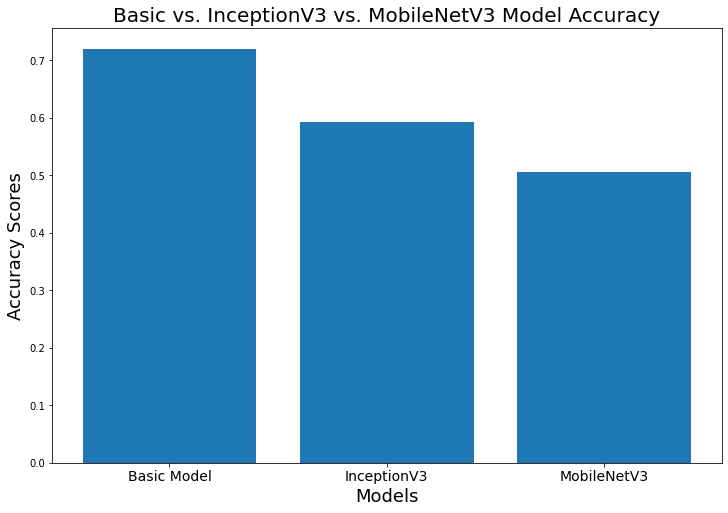

In [36]:
# Plot accuracy values to compare models
acc_values = [basic_acc, iv3_acc, mnv3_acc]

plt.figure(figsize=(12, 8))

x_pos = [i for i, _ in enumerate(models)]

plt.bar(x_pos, acc_values)
plt.xlabel('Models', fontsize=18)
plt.ylabel('Accuracy Scores', fontsize=18)
plt.title('Basic vs. InceptionV3 vs. MobileNetV3 Model Accuracy', fontsize=20)

plt.xticks(x_pos, models, fontsize=14);

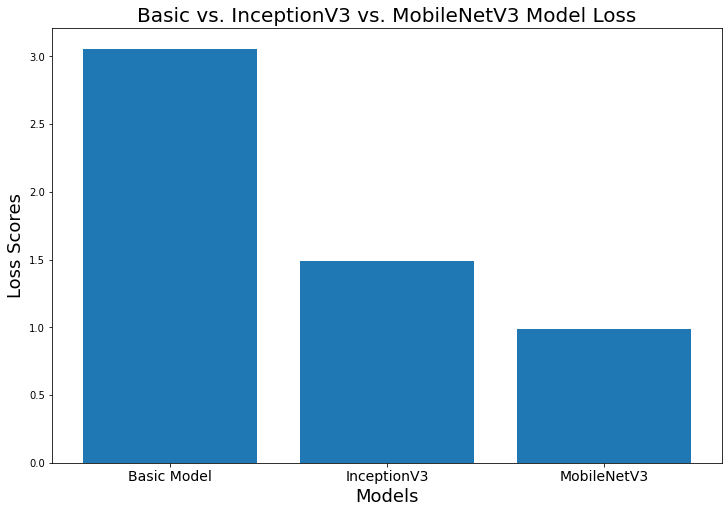

In [37]:
# Plot loss values to compare models
loss_values = [basic_loss, iv3_loss, mnv3_loss]

plt.figure(figsize=(12, 8))

x_pos = [i for i, _ in enumerate(models)]

plt.bar(x_pos, loss_values)
plt.xlabel('Models', fontsize=18)
plt.ylabel('Loss Scores', fontsize=18)
plt.title('Basic vs. InceptionV3 vs. MobileNetV3 Model Loss', fontsize=20)

plt.xticks(x_pos, models, fontsize=14);

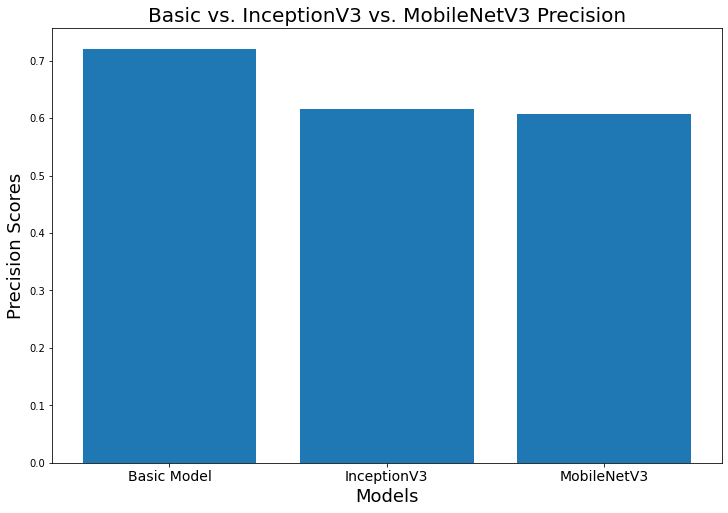

In [38]:
# Plot precision values to compare models
prec_values = [basic_prec, iv3_prec, mnv3_prec]

plt.figure(figsize=(12, 8))

x_pos = [i for i, _ in enumerate(models)]

plt.bar(x_pos, prec_values)
plt.xlabel('Models', fontsize=18)
plt.ylabel('Precision Scores', fontsize=18)
plt.title('Basic vs. InceptionV3 vs. MobileNetV3 Precision', fontsize=20)

plt.xticks(x_pos, models, fontsize=14);

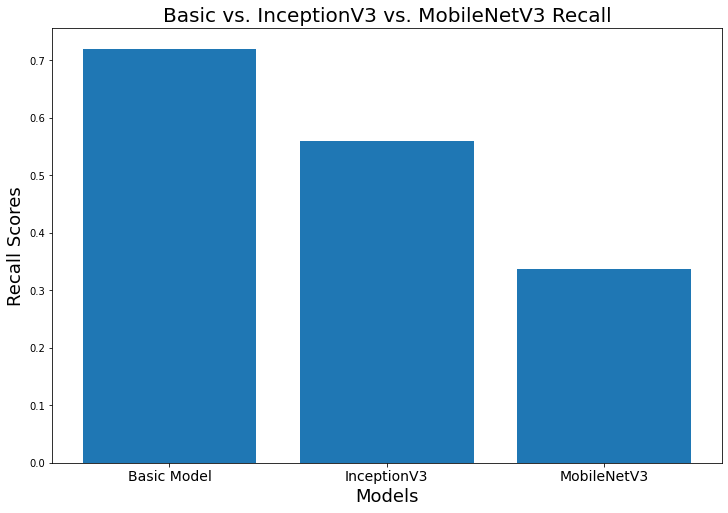

In [39]:
# Plot recall values to compare models
recall_values = [basic_recall, iv3_recall, mnv3_recall]

plt.figure(figsize=(12, 8))

x_pos = [i for i, _ in enumerate(models)]

plt.bar(x_pos, recall_values)
plt.xlabel('Models', fontsize=18)
plt.ylabel('Recall Scores', fontsize=18)
plt.title('Basic vs. InceptionV3 vs. MobileNetV3 Recall', fontsize=20)

plt.xticks(x_pos, models, fontsize=14);

The best performing model was the basic fine tuned model. It outperformed the InceptionV3 and MobileNetV3 models. It had an overall accuracy, precision, and recall of 72%